# Model Plots 

Some representative plots showing the model setup. 

In [1]:
# load modules 

import numpy as np
import xarray as xr
from xmitgcm import open_mdsdataset
from matplotlib import pyplot as plt
from matplotlib import colors, ticker, cm
from matplotlib.colors import LogNorm
%matplotlib inline
import os 
from xgcm import Grid

In [3]:
# Load Means 

Model_Tav = xr.open_dataset('./outputs_ncfiles/Model_Tav.nc')

In [4]:
# Load a snap shot
iters = [17573760]
data_dir = '/swot/SUM04/dbalwada/channel_model/05km_sponge/run_tracers_restored/'

model_vars = ['T']
ds_snap = open_mdsdataset(data_dir , delta_t=300, iters=iters,
                          prefix=model_vars,
                          ignore_unknown_vars=True, geometry='cartesian')

/home/dbalwada/.conda/envs/pangeo/lib/python3.6/site-packages/xmitgcm-0.2.2-py3.6.egg/xmitgcm/utils.py:423: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)


In [74]:
params = {
   'axes.labelsize': 12,
   'font.size': 12,
   'legend.fontsize': 12,
   'xtick.labelsize': 12,
   'ytick.labelsize': 12,
   'text.usetex': False,
   'figure.figsize': [4.5, 4.5]
   }
plt.rcParams.update(params)

In [149]:
X = Model_Tav.XC
Y = Model_Tav.YC
Z = Model_Tav.Z

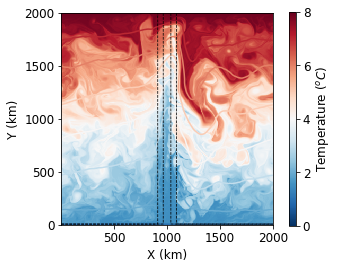

In [207]:
# Plot T snapshot, mean, and topography
fig, ax = plt.subplots(1,1)

im = ax.pcolormesh(X/1e3, Y/1e3, ds_snap['T'].sel(Z=-5, method='nearest').isel(time=0), 
                   vmin=0, vmax=8, cmap='RdBu_r',rasterized=True)
ax.contour(X/1e3, Y/1e3, Model_Tav.Ttave.sel(Z=0, method='nearest'),
           levels=np.linspace(0,8,9), cmap='RdBu_r', rasterized=True)

ax.contour(X/1e3, Y/1e3, Model_Tav.Depth, levels=[0, 2250, 2750], colors='k', linewidths=.75,
           linestyles='dashed')

ax.set_aspect('equal')
ax.set_xlabel('X (km)')
ax.set_ylabel('Y (km)')
ax.set_xticks([500, 1000, 1500, 2000])
ax.set_yticks([0, 500, 1000, 1500, 2000])


plt.tight_layout()
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.22, 0.02, 0.66])
fig.colorbar(im, cax=cbar_ax, ticks=[0,2,4,6,8])
cbar_ax.set_ylabel('Temperature ($^oC$)')
#cbar_ax.set_ticks([0,2,4,6,8])
plt.savefig('fig1a.pdf', dpi=200,bbox_inches='tight')


In [87]:
grid = Grid(Model_Tav, periodic='X')

EKE = 0.5*( grid.interp(Model_Tav.UUtave - Model_Tav.uVeltave**2, 'X') + 
           grid.interp(Model_Tav.VVtave - Model_Tav.vVeltave**2, 'Y', boundary='extend')  )

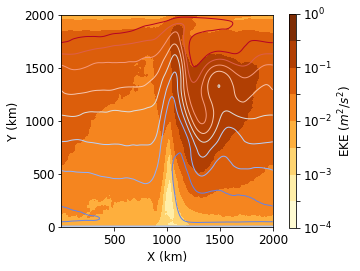

In [206]:
# plot EKE with SSH
fig, ax = plt.subplots(1,1)

im = ax.contourf(X/1e3,Y/1e3, EKE.isel(Z=0),  levels=np.logspace(-4, 0,9),
                 norm=colors.LogNorm(vmin=1e-4, vmax=1),
                 cmap='YlOrBr',  rasterized=True)
ax.contour(X/1e3, Y/1e3, Model_Tav.ETAtave, levels=np.linspace(-0.5,0.5,9),
              cmap='coolwarm', linewidths=1., rasterized=True)
ax.set_aspect('equal')
ax.set_xlabel('X (km)')
ax.set_ylabel('Y (km)')
ax.set_xticks([500, 1000, 1500, 2000])
ax.set_yticks([0, 500, 1000, 1500, 2000])

plt.tight_layout()
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.22, 0.02, 0.66])
fig.colorbar(im, cax=cbar_ax)
cbar_ax.set_ylabel('EKE ($m^2/s^2$)')
plt.savefig('fig1b.pdf', dpi=200,bbox_inches='tight')


In [168]:
from matplotlib import ticker

In [175]:
fmt = ticker.ScalarFormatter(useMathText=True)

/home/dbalwada/.conda/envs/pangeo/lib/python3.6/site-packages/matplotlib/contour.py:1561: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')


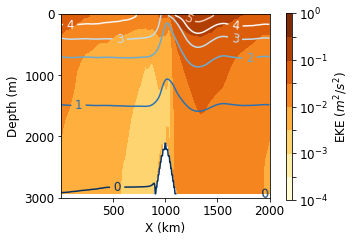

In [205]:
fig, ax = plt.subplots(1,1, figsize=(4.5,3.5))

im = ax.contourf(X/1e3,Z, EKE.sel(YC=1000e3, method='nearest'),  levels=np.logspace(-4, 0,9),
                 norm=colors.LogNorm(vmin=1e-4, vmax=1),
                 cmap='YlOrBr',  rasterized=True)
im2 = ax.contour(X/1e3,Z, Model_Tav.Ttave.sel(YC=1000e3, method='nearest'), 
                  levels=np.linspace(0,8,9),cmap='RdBu_r',  rasterized=True)

#ax.set_aspect('equal')
ax.set_xlabel('X (km)')
ax.set_ylabel('Depth (m)')
ax.set_xticks([500, 1000, 1500, 2000])
ax.set_yticks([-3000,-2000, -1000,0])
ax.set_yticklabels([3000,2000, 1000,0])

fmt = {}
strs = [0,1,2,3,4,5,6,7,8]
for l, s in zip(im2.levels, strs):
    fmt[l] = str(s)

ax.clabel(im2, im2.levels[::1], fmt=fmt)

plt.tight_layout()
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.19, 0.02, 0.74])
fig.colorbar(im, cax=cbar_ax)
cbar_ax.set_ylabel('EKE ($m^2/s^2$)')
plt.savefig('fig1c.pdf', dpi=200,bbox_inches='tight')


In [180]:
Uvel = grid.interp(Model_Tav.uVeltave, 'X')

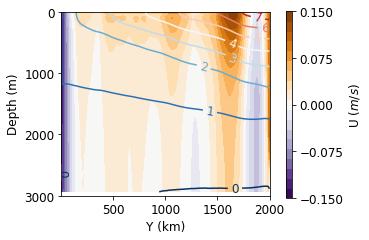

In [208]:
fig, ax = plt.subplots(1,1, figsize=(4.5,3.5))

im = ax.contourf(Y/1e3,Z, Uvel.sel(XC=0, method='nearest'),  
                 cmap='PuOr_r', levels=np.linspace(-0.15,0.15, 20), rasterized=True)
im2 = ax.contour(Y/1e3,Z, Model_Tav.Ttave.sel(XC=0, method='nearest'), 
                  levels=np.linspace(0,8,9),cmap='RdBu_r',  rasterized=True)

#ax.set_aspect('equal')
ax.set_xlabel('Y (km)')
ax.set_ylabel('Depth (m)')
ax.set_xticks([500, 1000, 1500, 2000])
ax.set_yticks([-3000,-2000, -1000,0])
ax.set_yticklabels([3000,2000, 1000,0])

fmt = {}
strs = [0,1,2,3,4,5,6,7,8]
for l, s in zip(im2.levels, strs):
    fmt[l] = str(s)

ax.clabel(im2, im2.levels[::1], fmt=fmt)

plt.tight_layout()
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.19, 0.02, 0.74])
cbar =fig.colorbar(im, cax=cbar_ax, ticks=np.linspace(-0.15,0.15,5))
cbar_ax.set_ylabel('U ($m/s$)')

fig.savefig('fig1d.pdf', dpi=200,bbox_inches='tight')
